название файла: Project 2  Exploratory Data Analysis (EDA) (отредактирован 09.06.2020)  
**Итоговое задание Кондратенко Алексея** по Проекту 2. Разведывательный анализ данных**   
***
**СОДЕРЖАНИЕ**<a name="start"></a>
1. [План выполнения проекта](#План_проекта) 
2. [Первичный анализ данных](#Первичный_анализ)
3. [Обработка всех колонок](#Обработка_всех_колонок)

    3.1. [Анализ столбца studytime_gr](#studytime_gr)
    
    3.2. [Анализ столбца address](#address)  
    
    3.3. [Анализ столбца famsize](#famsize) 
    
    3.4. [Анализ столбца Pstatus](#Pstatus) 
    
    3.5. [Анализ столбца Medu](#Medu)  
    
    3.6. [Анализ столбца Fedu](#Fedu)  
    
    3.7. [Анализ столбца Mjob, Fjob](#Mjob_Fjob) 
    
    3.8. [Анализ столбца Reason](#Reason)  
    
    3.9. [Анализ столбца Guardian](#Guardian)  
    
    3.10. [Анализ столбца Traveltime](#Traveltime) 
    
    3.11. [Анализ столбца Studytime](#Studytime)
    
    3.12. [Анализ столбца Failures](#Failures)  
    
    3.13. [Анализ столбцов с бинарными категориальные признаки (столбцы с значениями yes и no)](#binary)  
    
    3.14. [Анализ столбца Famrel](#Famrel)  
    
    3.15. [Анализ столбца Freetime](#Freetime)  
    
    3.16. [Анализ столбца Goout](#Goout)  
    
    3.17. [Анализ столбца Health](#Health)  
    
    3.18. [Анализ столбца Age](#Age)  
    
    3.19. [Анализ столбца Absences](#Absences) 
    
    3.20. [Анализ столбца Score](#Score) 


    
4. [Корреляционный анализ](#corr)  

    4.1. [Анализ категориальных переменных](#categ) 
    
    4.2. [Анализ "бинарных" категориальных признаков](#bin_rate) 
    
    4.3. [Анализ "оценочных" категориальных переменных](#num_rate)  
    
    4.4. [Тест Стьюдента по всем категориальным признакам](#ttest)  


5. [Выводы](#resum)  

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [34]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_columns', 50) # выведем больше колонок
pd.set_option('display.max_rows', 100) # выведем больше колонок

In [115]:
data = pd.read_csv('data/stud_math.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# 1. План выполнения проекта <a name="План_проекта"></a>

1. Провести первычную обработку данных(убрать пропуски в данных(NaN значения, пропущенные значения), определить все ли данные записаны корректно, представить текстовые значения в колонках в виде числовых))
2. Определить распреление признака для числовых переменных, устранить выбросы.
3. Оценить количество уникальных значений для нормативных переменных.
4. Преобразовать данные если необходимо.
5. Провести корреляционный анализ количественных переменных
6. Отобрать не коррелирующие переменные
7. Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину(в данном случае на переменую score)
8. Сформулировать выводы относительно качества данных и тех переменных, которые будут использованы в дальнейшем построении модели.
[перейти в начало](#start)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

# 2. Первичный анализ данных <a name="Первичный_анализ"></a>

Переименуем столбцы начинающиеся с большой буквы на маленькую для удобства, а также сложные названия в простые [перейти в начало](#start) 

In [97]:
data.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

### Посмотрим на столбец studytime и studytime_gr, которого не было в описании <a name="studytime_gr"></a>

Посмотрим на значения в этом столбце

In [120]:
data.loc[:,['studytime','studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
5,2.0,-6.0
6,2.0,-6.0
7,2.0,-6.0
8,2.0,-6.0
9,2.0,-6.0


Видим, что значения во втором столбце это просто умножение на -3 значений первого столбца и как следствие 100% корреляция этих столбцом.

In [121]:
data['studytime'].corr(data['studytime_gr'])

-0.9999999999999991

100% обратная корреляция говорит о том что эти столбцы идентичны. Удаляем столбец studytime_gr [перейти в начало](#start)

In [122]:
data.drop(['studytime_gr'], inplace = True, axis = 1)

# Проведём обработку каждой колонки в которых количество значений отличается от общего колчества строк в отдельности для выявления пропуском или значений равных NaN <a name="Обработка_колонок"></a>

Посмотрим сколько пропущенных значений мы имеем в каждой колонке

In [35]:
data.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Видим что пропусков нет только в колонках school, sex, age.
Попробуем исправить эту ситуации и заполнить пропуски. [перейти в начало](#start)

### address <a name="address"></a>

In [82]:
# В этой колонке имеем 17 недостающих значений, посмотрим что можем сделать

Так как в колонке с адресом у нас есть только 2 возможных категориальных значения заменим их на 0 - 'U' и 1 - 'R'

In [116]:
data['address'] = data.address.apply(lambda x: 0 if x == 'U' else 1 if x == 'R' else None)

Можем предположить что данные из колонки address зависят от school, traveltime и reason(со значением home). Построим график зависимости 

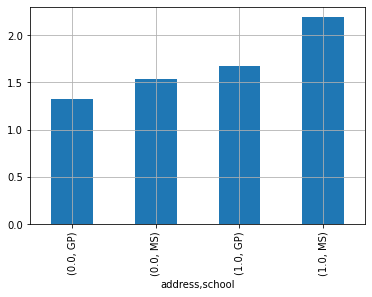

In [48]:
data.groupby(by = ['address', 'school'])['traveltime'].mean().plot(kind = 'bar', grid= True)

Исходя из графика видим, что если школа ученик живёт в городе, то в среднем он тратит меньше либо равно 1.5 времени, а если он живёт за городом, то тратит больше 1.5 времени. Так как зачения в traveltime представлены в виде целых чисел делаем вывод что если значение traveltime > 1 то ученик живёт за городом, если traveltime <= 1 то ученик живёт в городе. Применим данные изменения

In [117]:
data['address'] = data.apply(lambda x: 1 if pd.isnull(x['address']) and x['traveltime'] > 1 else 0 if pd.isnull(x['address']) and x['traveltime'] <=1 else x['address'], axis=1)

Проверим какие строки остались со значениями отличными от 0 и 1

In [118]:
address_nan_values_index = []
for i in range(len(data)):
    if data.address.loc[i] != 1 and data.address.loc[i] != 0:
        address_nan_values_index.append(i)
print(address_nan_values_index)

[241, 348, 372]


Для добавления значений в этих пропусках сделаем следущее:
    - найдём самую часто встречающуюся школу
    - найдём самое часто встречающееся место проживания и добавим его на место пропуска

In [100]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [58]:
data[data.school == 'GP'].address.value_counts()

0.0    285
1.0     62
Name: address, dtype: int64

Видим что самое частотное значение это 0(город), добавим вместо оставшихся пропусков 0

In [119]:
for i in address_nan_values_index:
    data.address.loc[i] = 0

In [120]:
data.address.unique()

array([0., 1.])

[перейти в начало](#start)

### famsize <a name="famsize"></a>

Данная колонка состоит из двух возможных значений: больше 3 или меньше либо равно 3. Изменим формат записи этих значений в колонке с текстового на числовой(bool), где 0 - LE3 и 1 - GT3. Для заполнения пропусков для этого колонки нет зависимотей с другими, поэтому найдём самое часто встречающиеся значение и запишем его вместо nan.

In [121]:
data.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [122]:
data.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [123]:
data['famsize'] = data.apply(lambda x: 0 if x['famsize'] == 'LE3' else 1 if x['famsize'] == 'GT3' else 1, axis=1)

In [124]:
data.famsize.unique()

array([1, 0])

[перейти в начало](#start)

### Pstatus <a name="Pstatus"></a>

In [125]:
data.Pstatus.unique()

array(['A', nan, 'T'], dtype=object)

Заменим текстовые значения в этой колонке на числовые 'A' - 0, 'T' - 1

In [126]:
data['Pstatus'] = data.Pstatus.apply(lambda x: 0 if x == 'A' else 1 if x == 'T' else None)

Посмотрим как зависит Pstatus от famsize

In [94]:
data[data.famsize == 0].Pstatus.value_counts()

1.0    81
0.0    13
Name: Pstatus, dtype: int64

In [95]:
data[data.famsize == 1].Pstatus.value_counts()

1.0    233
0.0     23
Name: Pstatus, dtype: int64

Видим что эти колонки никак не зависят друг от друга и что в среднем больше всего учеников живут вместе с родителями. Заменим прокуски наиболее часто встречающися значением, а именно 1(живут вместе).

In [127]:
data['Pstatus'] = data.Pstatus.apply(lambda x: 1 if pd.isnull(x) else x)

[перейти в начало](#start)

### Medu <a name="Medu"></a>

В этой колонке имеем 3 неизвестных значения. Образования напрямую зависит от работы, так как обычно человек без миниум 9 классов образования не может устроиться на работу. Посмотрим где работают матери тех детей у которых не указано образование матери.

In [149]:
medu_with_nan_study_index = []
for i in range(len(data2)):
    if pd.isnull(data2.Medu.loc[i]):
        medu_with_nan_study_index.append(i)

In [154]:
data.loc[medu_with_nan_study_index]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,0.0,0,1.0,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,1.0,1,1.0,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,0.0,1,1.0,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


Видим что в колонке Mjob есть значения которыя говорят о том что матери этих детей работают, значит заполним колонку Medu значением 2(5-9 классов образования) [перейти в начало](#start)

In [159]:
data.Medu.loc[medu_with_nan_study_index] = 2

### Fedu <a name="Fedu"></a>

Найдём индексы строк в которых Fedu == nan

In [174]:
fedu_with_nan_study_index = []
for i in range(len(data)):
    if pd.isnull(data.Fedu.loc[i]):
        fedu_with_nan_study_index.append(i)

In [175]:
data.loc[fedu_with_nan_study_index]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,0.0,1,1.0,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,0.0,1,1.0,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,0.0,0,0.0,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,0.0,1,1.0,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,0.0,0,1.0,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,0.0,1,1.0,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,0.0,1,0.0,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,0.0,1,1.0,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,0.0,1,1.0,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,1.0,1,1.0,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


Видим что Fjob у строк с Fedu == nan разное. Проведём анализ данных значений и посмотрим какое минимальное образование в наборе данных характерно для каждого вида работы.

In [170]:
print('Min study for health job', data2[data2.Fjob == 'health'].Fedu.min())
print('Min study for teacher job', data2[data2.Fjob == 'teacher'].Fedu.min())
print('Min study for services job', data2[data2.Fjob == 'services'].Fedu.min())
print('Min study for at_home job', data2[data2.Fjob == 'at_home'].Fedu.min())
print('Min study for other job', data2[data2.Fjob == 'other'].Fedu.min())

Min study for health job 1.0
Min study for teacher job 3.0
Min study for services job 1.0
Min study for at_home job 1.0
Min study for other job 0.0


Заполним пропуски согласно получиным значениям для каждого вида работы. Для тех отцов у которых нет значений работы и образования значение Fedu сделаем равным 0 так как значение NaN в поле Fjob можно расценивать как категорию other, а для этой категории минимальное значени образования это 0.

In [176]:
def fedu_changes(fedu, fjob):
    if pd.isnull(fedu):
        if fjob == 'health':
            return 1
        elif fjob == 'teacher':
            return 3
        elif fjob == 'services':
            return 1
        elif fjob == 'at_home':
            return 1
        elif fjob == 'other' or pd.isnull(fjob):
            return 0
    else:
        return fedu
    
data['Fedu'] = data.apply(lambda x: fedu_changes(x['Fedu'], x['Fjob']), axis=1)
        

[перейти в начало](#start)

### Mjob, Fjob <a name="Mjob_Fjob"></a>

Для тех строк в которых нет данных о работе метери и отца значение работы сделаем равным other.

In [185]:
data['Mjob'] = data.Mjob.apply(lambda x: 'other' if pd.isnull(x) else x)
data['Fjob'] = data.Fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

[перейти в начало](#start)

### Reason <a name="Reason"></a>

Для пропущенных значений в этой колонке найдём самую часто встречающуюся причину выбора школы для каждой школы в отдельности

In [208]:
print('Most common reason for GP school -', data[data.school == 'GP'].reason.value_counts().index[0])
print('Most common reason for MS school -', data[data.school == 'MS'].reason.value_counts().index[0])

Most common reason for GP school - course
Most common reason for MS school - course


Заменим значения nan на course в колонке reason

In [209]:
data['reason'] = data.reason.apply(lambda x: 'course' if pd.isnull(x) else x)

[перейти в начало](#start)

### Guardian <a name="Guardian"></a>

Для этой колонки нет зависимостей с другими, поэтому заполним пропущеные значение тем которое встречается чаще всего

In [3]:
print('Most common guardian -', data.guardian.value_counts().index[0])

Most common guardian - mother


In [4]:
data['guardian'] = data.guardian.apply(lambda x: 'mother' if pd.isnull(x) else x)

Заменим текстовые значения их числовыми аналогами, где 0 - mother, 1 - father, 2 - other

In [5]:
data['guardian'] = data.guardian.apply(lambda x: 0 if x == 'mother' else 1 if x == 'father' else 2 if x == 'other' else None)

[перейти в начало](#start)

### Traveltime <a name="Traveltime"></a>

Когда мы заполняли колонку address недастающими значениями, мы нашли зависимость traveltime от address и school, но так как мы не можем с точность сказать какое именно значение должно принимать traveltime, посмотрим на сдернее в этой колонке в зависимости от school и address

In [6]:
table = pd.pivot_table(data, values='traveltime', index=['school', 'address'], aggfunc=np.mean)
display(table)

traveltime
school address            
GP     0.0        1.309701
       1.0        1.684211
MS     0.0        1.529412
       1.0        2.200000

Видим что для тех учеников которые живут в городе и учатся в школе GP значение traveltime ближе к 1, для всех остальных случаев значение traveltime в среднем ближе к 2. Запонлим недостающие значения согласно данному утверждению:
    - если ученик учится в школе GP и живёт в городе, traveltime = 1
    - для остальных случаев traveltime = 2

In [7]:
def add_traveltime(traveltime, address, school):
    if pd.isnull(traveltime) and school == 'GP' and address == 0:
        return 1
    elif (pd.isnull(traveltime) and school == 'MS') or (pd.isnull(traveltime) and school == 'GP' and address == 1):
        return 2
    else:
        return traveltime

In [8]:
data['traveltime'] = data.apply(lambda x: add_traveltime(x['traveltime'], x['address'], x['school']), axis=1)

[перейти в начало](#start)

### Studytime <a name="Studytime"></a>

Посмотрим в каких строках studytime не имеет значений

In [19]:
studytime_index_nan = []
for i in range(len(data)):
    if pd.isnull(data.studytime.loc[i]):
        studytime_index_nan.append(i)

In [20]:
data.loc[studytime_index_nan]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,0.0,1,1.0,3.0,3.0,other,other,reputation,0,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,0.0,1,1.0,4.0,3.0,services,other,reputation,0,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,0.0,1,1.0,2.0,2.0,at_home,other,course,0,1.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,1.0,1,1.0,4.0,4.0,teacher,teacher,course,0,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,0.0,0,1.0,2.0,3.0,services,services,reputation,1,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,0.0,1,1.0,3.0,1.0,services,other,other,0,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,0.0,1,1.0,1.0,1.0,at_home,health,home,2,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


Можно предположить, что время которое ученик тратит на учёбу после школы зависит от количества свободного времени freetime и от времени проведённого с друзьями goout так что studytime приблизительно равно studytime -(freetime+goout). Посмотрим на то как studytime зависит от этих значений применив корреляционный анализ. 

In [21]:
data[['studytime', 'freetime', 'goout']].corr()

,studytime,freetime,goout
studytime,1.000000,-0.121969,-0.051280
freetime,-0.121969,1.000000,0.296437
goout,-0.051280,0.296437,1.000000


Видим обратную корреляцию между studytime и freetime, что говорит о том что чем больше freetime тем в среднем меньше времени тратит ученик на учёбу после школы.Посмотрим какие средние значения studytime мы получим для каждого возможного freetime значения.

In [31]:
table = pd.pivot_table(data, values='studytime', index=['freetime', 'goout'], aggfunc=np.mean, fill_value=0)
display(table)

studytime
freetime goout           
1.0      1.0     1.750000
         2.0     3.333333
         3.0     1.750000
         4.0     2.000000
         5.0     2.000000
2.0      1.0     1.400000
         2.0     2.269231
         3.0     2.176471
         4.0     1.818182
         5.0     1.500000
3.0      1.0     1.800000
         2.0     1.921053
         3.0     2.218750
         4.0     2.000000
         5.0     2.214286
4.0      1.0     2.000000
         2.0     2.055556
         3.0     2.181818
         4.0     1.921053
         5.0     1.764706
5.0      1.0     1.500000
         2.0     1.714286
         3.0     1.250000
         4.0     2.166667
         5.0     1.714286

Видим что в среднем studytime принимает значение приблизительно равное 2. Заполним пропуски в строках значением 2. 

In [35]:
data.studytime.loc[studytime_index_nan] = 2

[перейти в начало](#start)

### Failures <a name="Failures"></a>

Посмотрим в каких строках failures отсутствуют значения

In [39]:
failures_index_nan = []
for i in range(len(data)):
    if pd.isnull(data.failures.loc[i]):
        failures_index_nan.append(i)

In [40]:
data.loc[failures_index_nan].age.value_counts()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,0.0,1,1.0,4.0,1.0,health,health,other,1,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,0.0,1,1.0,4.0,2.0,teacher,other,home,0,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,0.0,0,1.0,3.0,3.0,other,other,other,0,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,1.0,0,1.0,2.0,2.0,health,other,reputation,0,2.0,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,0.0,1,1.0,4.0,3.0,services,other,reputation,0,1.0,2.0,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,0.0,1,1.0,3.0,3.0,services,other,home,1,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,1.0,1,1.0,4.0,4.0,other,other,home,1,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,1.0,1,1.0,2.0,1.0,health,services,reputation,0,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,0.0,1,1.0,4.0,4.0,teacher,teacher,course,1,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,0.0,1,1.0,3.0,4.0,services,services,home,1,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


Посмотрим какое среднее значение failures в нашем датасете

In [46]:
data.failures.mean()

0.3378016085790885

Посмотрим как эта колонка коррелирует с другими в датасете

In [45]:
data.corr()

,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,0.157088,-0.020143,0.014241,-0.160960,-0.128565,0.221920,0.089480,-0.015355,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
address,0.157088,1.000000,0.056024,0.044454,-0.139757,-0.061153,-0.079427,0.335746,0.040859,0.121266,-0.040967,0.035856,-0.033680,-0.051572,0.037369,-0.027241,-0.099072
famsize,-0.020143,0.056024,1.000000,0.064290,0.050176,0.060480,0.041708,-0.033068,0.075610,-0.001668,-0.076326,0.017673,-0.014274,-0.037186,0.049947,-0.017267,-0.064874
Pstatus,0.014241,0.044454,0.064290,1.000000,-0.130239,-0.014661,0.013582,0.083958,0.003874,0.006090,-0.004138,0.010414,0.046596,0.037693,0.003951,-0.106116,-0.040135
Medu,-0.160960,-0.139757,0.050176,-0.130239,1.000000,0.247582,-0.135351,-0.168400,0.080020,-0.244599,-0.080635,-0.010376,0.022814,0.064290,-0.042628,-0.011159,0.217305
Fedu,-0.128565,-0.061153,0.060480,-0.014661,0.247582,1.000000,0.031463,0.037898,0.050013,-0.154413,-0.050085,0.040512,-0.076920,-0.021977,0.008863,0.005933,0.080044
guardian,0.221920,-0.079427,0.041708,0.013582,-0.135351,0.031463,1.000000,0.072514,0.022944,0.171686,-0.023337,-0.008059,0.026099,-0.063782,-0.001098,-0.024048,-0.041457
traveltime,0.089480,0.335746,-0.033068,0.083958,-0.168400,0.037898,0.072514,1.000000,-0.095785,0.078954,0.096914,-0.021560,-0.027169,0.044000,-0.028457,-0.044482,-0.085313
studytime,-0.015355,0.040859,0.075610,0.003874,0.080020,0.050013,0.022944,-0.095785,1.000000,-0.177582,-1.000000,0.045308,-0.120215,-0.050773,-0.079415,-0.026502,0.114295
failures,0.228047,0.121266,-0.001668,0.006090,-0.244599,-0.154413,0.171686,0.078954,-0.177582,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338


Наибольшая корреляция наблюдается с колонкой score и age. Отрицальеная корреляция говорит о том что в среднем чем больше failures тем меньше score. Смотря на положительную зависимость между age и failures можно предположить что с возрастом ученики делают меньше внеучебных ошибок.

Посмотрим какое среднее значение принимает failures в зависимотри от score

In [94]:
table = pd.pivot_table(data, 
                       values='failures', 
                       index=['score'], 
                       aggfunc=np.mean, 
                       fill_value=0)
display(table)

,failures
score,
0.0,0.857143
20.0,2.000000
25.0,1.000000
30.0,0.000000
35.0,1.444444
40.0,0.607143
45.0,0.423077
50.0,0.384615
55.0,0.068182


Видим следующее:
    - для тех у кого score = 30, и для тех у кого score больше 35 значение failures = 0 в большинстве случаев
    - для всех остальных значений score, значение failures в среднем ближе к 1.
Заполним пропуски исходя из вывода.

In [97]:
def add_failures(score, failures):
    if pd.isnull(failures) and score!=30 and score<=35:
        return 1
    elif pd.isnull(failures) and (score==30 or score>35):
        return 0
    else:
        return failures

In [100]:
data['failures'] = data.apply(lambda x: add_failures(x['score'], x['failures']), axis=1)

[перейти в начало](#start)

### Бинарные категориальные признаки (столбцы с значениями yes и no) <a name="binary"></a>
##### 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'

Проведём обработку этих столбцов вместе, чтобы сразу изменить строковый формат представления этих признаков в столбцах на числовой: yes - 1, no - 0.

In [168]:
data['schoolsup'] = data.schoolsup.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['famsup'] = data.famsup.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['paid'] = data.paid.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['activities'] = data.activities.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['nursery'] = data.nursery.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['higher'] = data.higher.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['internet'] = data.internet.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)
data['romantic'] = data.romantic.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None)

Найдём индексы значений равных NaN в колонках с бинарными категориальными признаками

In [169]:
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [170]:
binary_index_nan = {'schoolsup': [], 
                    'famsup': [], 
                    'paid': [], 
                    'activities': [], 
                    'nursery': [], 
                    'higher': [], 
                    'internet': [], 
                    'romantic': []}
for i in binary_columns:
    for z in range(len(data)):
        if pd.isnull(data[i].loc[z]):
            binary_index_nan[i].append(z)

In [171]:
for item, values in binary_index_nan.items():
    print(item, len(values))

schoolsup 9
famsup 39
paid 40
activities 14
nursery 16
higher 20
internet 34
romantic 31


Видим что в этих колонках не хватает достаточного количества значений. Так как эти колонки бинарные мы не можем заполнить их самым часто встречающимся значением.

Посмотрим какие зависимости сможем найти применяя pivot_table для schoolsup

In [172]:
table = pd.pivot_table(data2, 
                       values='schoolsup', 
                       index=['famsup', 'paid', 'activities'], 
                       aggfunc=np.sum, 
                       fill_value=0)
display(table)

schoolsup
famsup paid activities           
0.0    0.0  0.0                 3
            1.0                 3
       1.0  0.0                 0
            1.0                 1
1.0    0.0  0.0                 6
            1.0                 4
       1.0  0.0                 5
            1.0                 9

Видим что для учеников у которых famsup = 0, paid=1 и activities = 0 - schoolsup = 0. Найдём этих учеников в датасете

In [173]:
data2[(data2.famsup == 0) & (data2.paid == 1) & (data2.activities == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,0.0,1,1.0,4.0,2.0,health,services,other,0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0,-3.0,1.0,1.0,NaN,2.0,2.0,4.0,1.0,4.0,75.0
77,GP,F,16,0.0,1,1.0,2.0,2.0,other,other,course,0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,-12.0,1.0,1.0,1.0,5.0,2.0,3.0,3.0,0.0,55.0
85,GP,F,15,0.0,1,1.0,4.0,4.0,services,services,reputation,1,2.0,2.0,2.0,0.0,0.0,1.0,0.0,NaN,-6.0,1.0,1.0,1.0,4.0,4.0,4.0,5.0,6.0,40.0
124,GP,F,16,0.0,1,1.0,2.0,2.0,other,other,home,0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,-6.0,1.0,1.0,1.0,5.0,4.0,4.0,5.0,0.0,40.0
216,GP,F,17,0.0,1,1.0,4.0,3.0,other,other,reputation,0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,-6.0,1.0,1.0,1.0,3.0,4.0,5.0,1.0,22.0,20.0
249,GP,M,16,0.0,1,1.0,0.0,2.0,other,other,other,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,-3.0,1.0,1.0,0.0,4.0,3.0,2.0,5.0,0.0,75.0
285,GP,M,17,0.0,1,1.0,1.0,1.0,other,other,reputation,1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.0,1.0,1.0,0.0,4.0,3.0,3.0,4.0,2.0,55.0
301,GP,M,17,0.0,0,1.0,4.0,4.0,other,teacher,home,1,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-3.0,1.0,1.0,0.0,4.0,1.0,1.0,5.0,0.0,50.0
336,GP,F,19,1.0,1,0.0,3.0,1.0,services,other,home,2,1.0,3.0,1.0,0.0,0.0,1.0,0.0,NaN,-9.0,1.0,0.0,0.0,5.0,4.0,3.0,5.0,12.0,65.0
366,MS,M,18,0.0,0,1.0,4.0,4.0,teacher,services,other,0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,-9.0,1.0,1.0,1.0,4.0,2.0,2.0,5.0,0.0,65.0


Видим что есть одно значение NaN в колонке с индексом 27. Запишем в значение schoolsup в этой строке 0.

In [174]:
data2['schoolsup'].loc[27] = 0

Для остальных значений не предоставляется возможности заполнить пропуски. Оставим пропущенные значения в этих колонках так как на данный момент нет возможности их заполнить по причине отсутсвия явных пересечений в этих данных с другими колонками. [перейти в начало](#start)

### Famrel <a name="Famrel"></a>

In [203]:
data.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Видим что есть одно значение отсутствующее в исходном описании области значений критерия при этом оно по написанию очень похоже на 1.0, предположим что эта ошибка вызвана "челевеческим фактор" при внесении информации. Заменим его на 1.0.

In [204]:
data.loc[data2['famrel'] == -1.0, 'famrel'] = 1.0

Найдём и посмотрим на строки с пропущенными значения в колонке famrel

In [185]:
famrel_index_nan = []
for i in range(len(data)):
    if pd.isnull(data.famrel.loc[i]):
        famrel_index_nan.append(i)

In [186]:
data.loc[famrel_index_nan]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
8,GP,M,15,0.0,0,0.0,3.0,2.0,services,other,home,0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,1.0,0.0,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,0.0,0,1.0,4.0,4.0,health,services,course,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-3.0,1.0,NaN,0.0,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,0.0,1,1.0,4.0,3.0,teacher,other,reputation,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,-6.0,1.0,1.0,0.0,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,0.0,1,1.0,2.0,2.0,services,services,course,1,1.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,-3.0,1.0,1.0,0.0,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,1.0,1,1.0,1.0,1.0,other,other,reputation,0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,-6.0,1.0,1.0,1.0,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,0.0,1,1.0,3.0,1.0,other,other,course,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-3.0,1.0,0.0,0.0,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,0.0,1,1.0,4.0,3.0,teacher,other,home,0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,-6.0,1.0,1.0,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,0.0,0,1.0,2.0,2.0,services,health,reputation,0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,-12.0,1.0,1.0,0.0,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,0.0,1,1.0,4.0,4.0,services,other,course,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,1.0,1.0,0.0,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,1.0,1,1.0,1.0,3.0,other,other,course,1,3.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,-6.0,1.0,NaN,0.0,NaN,2.0,4.0,5.0,20.0,40.0


Можно предположить что отношения в семье могут зависить от размера семьи и от статуса проживания. Проверим это

In [188]:
table = pd.pivot_table(data, 
                       values='famrel', 
                       index=['famsize', 'Pstatus'], 
                       aggfunc=np.mean, 
                       fill_value=0)
display(table)

famrel
famsize Pstatus          
0       0.0      4.250000
        1.0      3.865169
1       0.0      3.700000
        1.0      3.967611

Видим что значение famrel приблизительно равно 4 в не зависимости от размера семьи и статуса проживания. Посмотрим на среднее значение в колонке famrel.

In [193]:
data.famrel.mean()

3.9375

Заполним пропуски получившимся средним значением: 4.

In [206]:
data['famrel'] = data.famrel.apply(lambda x: 4 if pd.isnull(x) else x)

[перейти в начало](#start)

### Freetime  <a name="Freetime"></a>

In [209]:
data.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Посмотрим от какого значения больше всего зависит freetime. Как мы определили ранее заполняя пропуски в колонке studytime, колонки studytime, freetime и goout имеют зависимость.

In [211]:
data.corr()

,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,0.157088,-0.020143,0.014241,-0.160960,-0.128565,0.221920,0.089480,-0.015355,0.232085,-0.256343,-0.159311,-0.030502,-0.110231,-0.106453,0.015556,-0.207837,-0.108964,0.144440,0.066693,0.029023,0.135107,-0.065946,0.093592,-0.155726
address,0.157088,1.000000,0.056024,0.044454,-0.139757,-0.061153,-0.079427,0.335746,0.040859,0.109751,-0.029669,-0.028113,-0.055641,0.043436,-0.077420,-0.040967,-0.049177,-0.187732,0.010021,0.035128,-0.033680,-0.051572,0.037369,-0.027241,-0.099072
famsize,-0.020143,0.056024,1.000000,0.064290,0.050176,0.060480,0.041708,-0.033068,0.075610,-0.002561,0.030021,0.110174,0.072407,0.032036,-0.097215,-0.076326,0.019845,0.004573,-0.003579,0.017649,-0.014274,-0.037186,0.049947,-0.017267,-0.064874
Pstatus,0.014241,0.044454,0.064290,1.000000,-0.130239,-0.014661,0.013582,0.083958,0.003874,0.008061,-0.032715,-0.021298,0.043471,0.099487,-0.066322,-0.004138,-0.030602,0.059840,-0.048158,0.008893,0.046596,0.037693,0.003951,-0.106116,-0.040135
Medu,-0.160960,-0.139757,0.050176,-0.130239,1.000000,0.247582,-0.135351,-0.168400,0.080020,-0.242813,-0.045111,0.205590,0.182766,0.108181,0.185052,-0.080635,0.178821,0.210453,0.026486,-0.010042,0.022814,0.064290,-0.042628,-0.011159,0.217305
Fedu,-0.128565,-0.061153,0.060480,-0.014661,0.247582,1.000000,0.031463,0.037898,0.050013,-0.148512,0.003339,0.130044,0.000696,0.088321,0.098047,-0.050085,0.086980,0.069925,-0.032457,0.039371,-0.076920,-0.021977,0.008863,0.005933,0.080044
guardian,0.221920,-0.079427,0.041708,0.013582,-0.135351,0.031463,1.000000,0.072514,0.022944,0.165580,-0.018677,-0.009128,-0.080820,-0.005188,-0.108416,-0.023337,-0.019833,0.009802,0.074229,-0.008040,0.026099,-0.063782,-0.001098,-0.024048,-0.041457
traveltime,0.089480,0.335746,-0.033068,0.083958,-0.168400,0.037898,0.072514,1.000000,-0.095785,0.076368,-0.003676,-0.039100,-0.058123,-0.003273,-0.030744,0.096914,-0.091853,-0.092672,0.023458,-0.021234,-0.027169,0.044000,-0.028457,-0.044482,-0.085313
studytime,-0.015355,0.040859,0.075610,0.003874,0.080020,0.050013,0.022944,-0.095785,1.000000,-0.174991,0.030772,0.128582,0.198857,0.109487,0.082644,-1.000000,0.174235,0.062833,0.055368,0.043739,-0.120215,-0.050773,-0.079415,-0.026502,0.114295
failures,0.232085,0.109751,-0.002561,0.008061,-0.242813,-0.148512,0.165580,0.076368,-0.174991,1.000000,0.006551,-0.086543,-0.184246,-0.086346,-0.107739,0.176488,-0.288952,-0.060281,0.092875,-0.033313,0.103484,0.122542,0.074604,0.055583,-0.353007


Видим что наибольшая корреляция наблюдается с колонкой goout. Можно предположить что чем выше значение goout тем выше значение freetime. Посмотрим как в среднем распределено числоваое значение freetime в зависимости от goout

In [212]:
table = pd.pivot_table(data, 
                       values='freetime', 
                       index=['goout'], 
                       aggfunc=np.mean, 
                       fill_value=0)
display(table)

,freetime
goout,
1.0,2.954545
2.0,2.917526
3.0,3.130081
4.0,3.463415
5.0,3.826923


Видим что в среднем если goout меньше либо равен 3 freetime в среднем равен 3, в случае когда goout больше 3 значение freetime в среднем равно 4.

Заполним пропуски исходя из найденной зависимости

In [219]:
data['freetime'] = data.apply(lambda x: 3 if pd.isnull(x['freetime']) and x['goout'] <=3 else 4 if pd.isnull(x['freetime']) and x['goout'] > 3 else x['freetime'], axis=1)

[перейти в начало](#start)

### Goout <a name="Goout"></a>

In [223]:
data.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Значения в этой колонке заполним по такому же принципе как и в колонке freetime, только теперь посмотрим на то как изменяется среднее значение goout от freetime

In [222]:
table = pd.pivot_table(data, 
                       values='goout', 
                       index=['freetime'], 
                       aggfunc=np.mean, 
                       fill_value=0)
display(table)

,goout
freetime,
1.0,2.294118
2.0,2.730159
3.0,2.987261
4.0,3.433628
5.0,3.621622


Видим что если значения freetime = 1, то значение goout близко к 2, если значение freetime = 2,3,4 то значние goout близко к 3, в случае когда значение freetime = 5, значение goout близко к 4. Заполним пропуски принимая в учёт полученную информацию

In [224]:
def change_goout(freetime, goout):
    if pd.isnull(goout) and freetime == 1:
        return 2
    elif pd.isnull(goout) and (freetime == 2 or freetime == 3 or freetime == 4):
        return 3
    elif pd.isnull(goout) and freetime == 5:
        return 4
    else:
        return goout

In [226]:
data['goout'] = data.apply(lambda x: change_goout(x['freetime'], x['goout']), axis=1)

[перейти в начало](#start)

### Health <a name="Health"></a>

In [229]:
data.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Для этой колонки нет определённой зависимости от других колонок в датасете. Заполним пропуски средним значением этой колонки

In [232]:
round(data.health.mean())

4.0

In [234]:
data['health'] = data.health.apply(lambda x: 4 if pd.isnull(x) else x)

[перейти в начало](#start)

### Age <a name="Age"></a>

Посмотрим на числовое распределение age

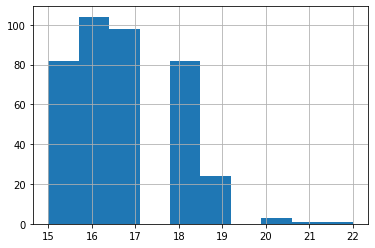

In [69]:
data.age.hist()

Визуально кажется что есть пропущенные значения. Изменим параметр bins и посмотрим на распределение

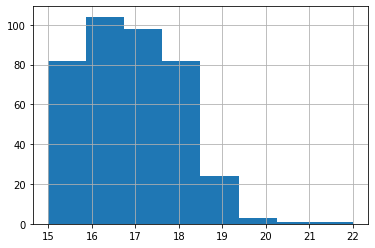

In [70]:
data.age.hist(bins=8)

Теперь пропусков нет. Построим boxplot и посмотрим есть ли выбросы

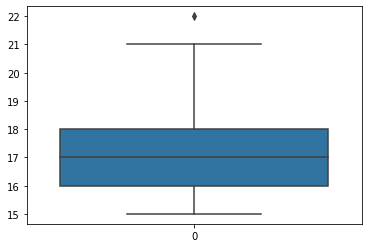

In [71]:
sns.boxplot(data=data.age)

Видим что есть одно значение - 22 которое boxlot определил как выброс. Посмотрим на квартильный анализ чтобы расчитать точные значения

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


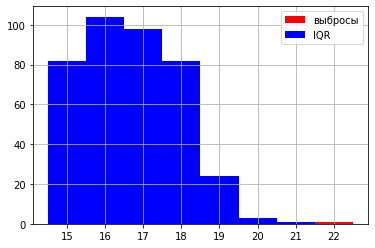

In [72]:
median = data.age.median()
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
q25 = data.age.quantile(0.25)
q75 = data.age.quantile(0.75)
print('25-й перцентиль: {},'.format(q25),
      '75-й перцентиль: {},'.format(q75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{}, {}].".format(q25 - 1.5*IQR, q75 + 1.5*IQR))


data.age.loc[data.age <= 22].hist(bins = 8, 
                                  range = (14.5, 22.5), 
                                  color = 'red',
                                  label = 'выбросы')

data.age.loc[data.age.between(q25 - 1.5*IQR, q75 + 1.5*IQR)].hist(bins = 8, 
                                                                  range = (14.5, 22.5),
                                                                  color = 'blue',
                                                                  label = 'IQR')

plt.legend()

Видим что действительно граница находится на 21 и значение 22 это выброс, так как распределение похоже на логнормальное и характеризуется длинным хвостом справа. Проверим эту гипотезу

In [73]:
data_age_ln = data.age.apply(lambda x: math.log(x))

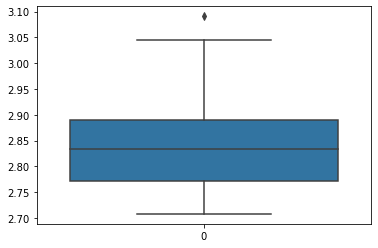

In [75]:
sns.boxplot(data=data_age_ln)

Видим что это не значение не типичный случай. Удаляем его

In [76]:
data.loc[data['age'] == 22.0, 'age'] = np.nan

In [77]:
data.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

Ещё раз построим boxplot чтобы убедится что выбросов больше нет

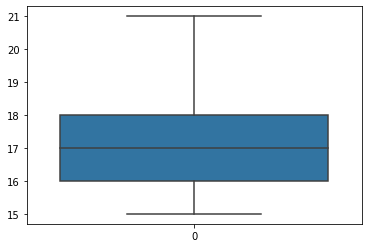

In [78]:
sns.boxplot(data=data.age)

Распределение признака похоже на логнормальное (то есть имеет длинный хвост справа) это говорит о том что редко но встречаются ученики старше 18 лет и это видимо связано с тем что некоторые ученики позже заканчивают школу из-за неуспеваемости. Выбросов теперь нет (удалили одно значение равное 22 определённое как выброс). Медиана смещена влево, это означает что большинство учеников в возрасте 16-17 лет. [перейти в начало](#start)

### Absences <a name="Absences"></a>

Посмотрим как распределены значения в этой колонке

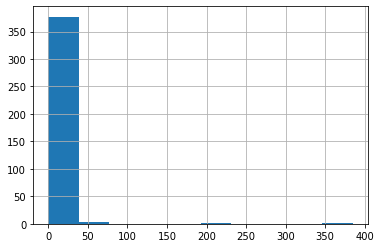

In [15]:
data.absences.hist()

Видим что большинство значений расположены в пределах от 0 до ~40. Посмотрим есть ли выбросы построив boxplot

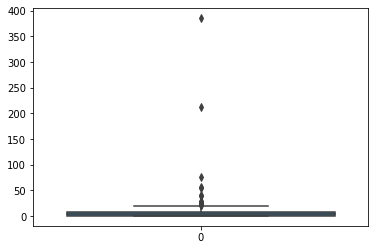

In [16]:
sns.boxplot(data=data.absences)

Найдём нижний и верхний квартили чтобы посмотрить в каком диапазоне находятся значения выбросов(ниже 25% квартиля либо выше 75% квартиля)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


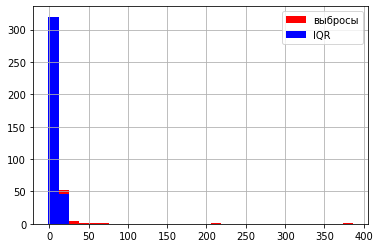

In [21]:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
q25 = data.absences.quantile(0.25)
q75 = data.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{}, {}].".format(q25 - 1.5*IQR, q75 + 1.5*IQR))


data.absences.loc[data.absences <= data.absences.max()].hist(bins = 30, 
                                  range = (-1, data.absences.max()+1), 
                                  color = 'red',
                                  label = 'выбросы')

data.absences.loc[data.absences.between(q25 - 1.5*IQR, q75 + 1.5*IQR)].hist(bins = 30, 
                                                                       range = (-1, data.absences.max()+1),
                                                                       color = 'blue',
                                                                       label = 'IQR')

plt.legend()

Исходя из представленного графика, можно увидеть что данное распределение похоже на логнормальное распределение. Для проверки гипотезы добавим небольшое смещение epsilon, так как самое часто встречающееся значение это 0.

In [25]:
data.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [26]:
epsilon = 0.001

Применим логарифмирование и проверим распределение на логнормальность

In [35]:
data_absences_ln = data.absences.apply(lambda x: math.log(x+epsilon))

Теперь вновь посмотрим на boxplot на наличие выбросов

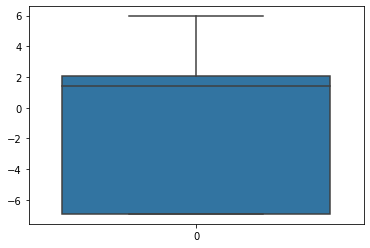

In [37]:
sns.boxplot(data=data_absences_ln)

Видим что выбросов нет.
Продолжаем.

Предпложим что кол-во пропусков может быть следствием критериев health, freetime, goout, famrel, так как:

- если ребенок много болеет то он пропускает занятия (health — текущее состояние здоровья (от 1 - очень плохо до 5 очень хорошо)) 

- если у ребёнка много свободного времени после учебы то скорее всего он уделяет мало времени самой учёбе (freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)) 

- если ребенок много времени проводит с друзьями, то скорее всего он уделяет мало времени учёбе (goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много))

- если у ребёнка плохие отношения в семье, то скорее всего он не хочет находится большую часть времени дома и поэтому мало уделяет времени учёбе (famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо))

Попробуем сгрупировать данные пропущенных значений по этим критериям

In [47]:
data.pivot_table(['health', 'famrel', 'goout', 'freetime'], data.absences, aggfunc=['count','mean'])

count                            mean                              
         famrel freetime goout health    famrel  freetime     goout    health
absences                                                                     
0.0         111      111   111    111  4.090090  3.234234  2.891892  3.639640
1.0           3        3     3      3  4.666667  3.000000  2.333333  3.666667
2.0          60       60    60     60  3.866667  3.166667  2.916667  3.733333
3.0           8        8     8      8  3.625000  3.625000  3.625000  3.250000
4.0          53       53    53     53  4.000000  3.150943  3.320755  3.358491
5.0           5        5     5      5  2.800000  3.200000  2.800000  3.400000
6.0          31       31    31     31  3.967742  3.161290  3.580645  3.548387
7.0           6        6     6      6  4.166667  3.833333  3.166667  3.500000
8.0          21       21    21     21  4.047619  3.047619  2.857143  3.476190
9.0           3        3     3      3  4.666667  3.333333  3.000000  3.666667
10.0         17       17    17     17  3.882353  3.411765  3.176471  3.352941
11.0          2        2     2      2  4.000000  3.000000  2.500000  4.500000
12.0         12       12    12     12  3.833333  3.416667  2.833333  3.666667
13.0          2        2     2      2  4.500000  2.500000  4.500000  3.500000
14.0         12       12    12     12  3.166667  3.416667  3.416667  3.250000
15.0          2        2     2      2  3.000000  4.000000  4.000000  4.500000
16.0          7        7     7      7  4.285714  3.857143  3.714286  3.857143
17.0          1        1     1      1  4.000000  5.000000  4.000000  1.000000
18.0          5        5     5      5  3.800000  3.200000  2.600000  4.200000
19.0          1        1     1      1  4.000000  4.000000  4.000000  3.000000
20.0          4        4     4      4  3.750000  3.500000  2.750000  3.750000
21.0          1        1     1      1  3.000000  1.000000  2.000000  2.000000
22.0          3        3     3      3  3.333333  2.666667  3.666667  1.666667
23.0          1        1     1      1  5.000000  2.000000  2.000000  5.000000
24.0          1        1     1      1  4.000000  2.000000  4.000000  2.000000
25.0          1        1     1      1  3.000000  3.000000  3.000000  3.000000
26.0          1        1     1      1  4.000000  3.000000  5.000000  2.000000
28.0          1        1     1      1  4.000000  4.000000  3.000000  5.000000
30.0          1        1     1      1  4.000000  4.000000  4.000000  5.000000
38.0          1        1     1      1  4.000000  3.000000  4.000000  4.000000
40.0          1        1     1      1  4.000000  1.000000  2.000000  3.000000
54.0          1        1     1      1  4.000000  3.000000  3.000000  5.000000
56.0          1        1     1      1  5.000000  3.000000  3.000000  1.000000
75.0          1        1     1      1  4.000000  1.000000  1.000000  5.000000
212.0         1        1     1      1  5.000000  5.000000  4.000000  4.000000
385.0         1        1     1      1  2.000000  3.000000  1.000000  3.000000

Исходя из данных в таблице выше нельзя сказать, что существует какая-то зависимость между этими колонками. Оставляем пропуски без изменений. В заключении по этой колонке можно сказать следующее:
- распределение признака логнормальное (имеет длинный хвост справа) 
- выбросов нет
- медиана смещена влево

[перейти в начало](#start)

### Score <a name="Score"></a>

Посмотрим на численное распределение:

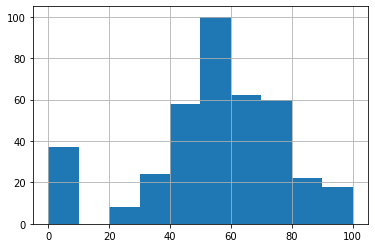

In [48]:
data.score.hist()

Часть значений от 20 до 100 распределена нормально, но видим выброс значений в самом начале. Построим boxplot чтобы посмотреть есть ли выбросы на самом деле.

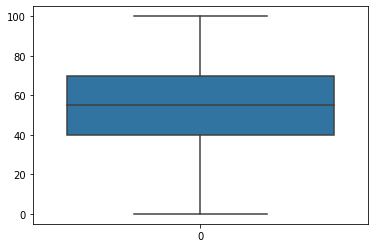

In [50]:
sns.boxplot(data=data.score)

Произведём анализ границ и расчитаем их точные значения

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


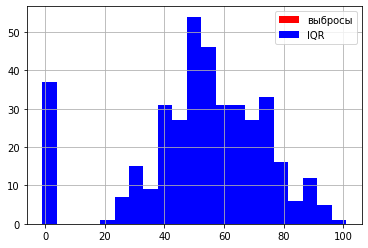

In [58]:
median = data.score.median()
IQR = data.score.quantile(0.75) - data.absences.quantile(0.25)
q25 = data.score.quantile(0.25)
q75 = data.score.quantile(0.75)
print('25-й перцентиль: {},'.format(q25),
      '75-й перцентиль: {},'.format(q75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{}, {}].".format(q25 - 1.5*IQR, q75 + 1.5*IQR))


data.score.loc[data.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

data.score.loc[data.score.between(q25 - 1.5*IQR, q75 + 1.5*IQR)].hist(bins = 21, 
                                                                      range = (-1, 101),
                                                                      color = 'blue',
                                                                      label = 'IQR')

plt.legend()

In [59]:
data.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [60]:
data.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Видим что у нас имеется достаточно большое количество значений равных 0(скорее всего это ученики которые не явились на экзамен по какой-то причине, так как у нас нет учеников которые пропустили всю учёбу, а следоваетльно хотя бы на один вопрос должны были ответить верно)

Посмотрим на распределение без 0.

In [61]:
data_score_without_0 = data.score.apply(lambda x: x if x>0 else np.nan)

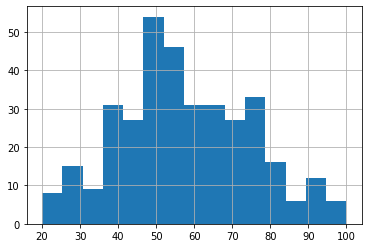

In [62]:
data_score_without_0.hist(bins = 15)

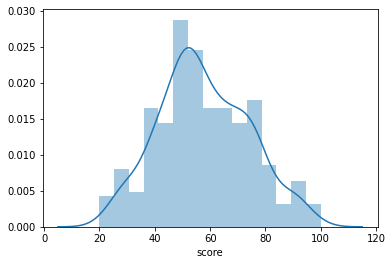

In [63]:
sns.distplot(data_score_without_0, bins = 15)

Видим что распределение значений нормальное и выбросов не наблюдается. Посмотрим на квартильные границы

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


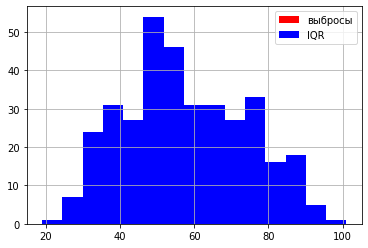

In [64]:
median = data_score_without_0.median()
IQR = data_score_without_0.quantile(0.75) - data_score_without_0.quantile(0.25)
q25 = data_score_without_0.quantile(0.25)
q75 = data_score_without_0.quantile(0.75)
print('25-й перцентиль: {},'.format(q25),
      '75-й перцентиль: {},'.format(q75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{}, {}].".format(q25 - 1.5*IQR, q75 + 1.5*IQR))


data_score_without_0.loc[data_score_without_0 <= 101].hist(bins = 15, 
                                                           range = (19, 101), 
                                                           color = 'red',
                                                           label = 'выбросы')

data_score_without_0.loc[data_score_without_0.between(q25 - 1.5*IQR, q75 + 1.5*IQR)].hist(bins = 15, 
                                                                                          range = (19, 101),
                                                                                          color = 'blue',
                                                                                          label = 'IQR')

plt.legend()

Исходя из результатов распределения без ноля, видно, что достаточное кол-во строк по медианному значению 55 и по значению 50 делают распределение вытянутым вверх, потому что расброс значений большой, дисперсия увеличена и распределение выглядит вытянутым в бока. При такой ситуации оно может вбирать в себя выбросы которые будут возникать рядом, таким образом нижняя граница выбросов распределения без нуля равна 7.5(это рядом с нулем). 

Теперь выясним что такое ноль. Очень часто при внесении данных могут возникать ошибки из-за человеческого фактора или автоматической загрузки данных, так же исходя из данных нашего датасета это могуть быть результаты учеников не пришедших на экзамен. Часто недостающее значение записывают как ноль. В нашем случае нолей досточно для того чтобы определить их как отдельное распределение. В результате мы видим два распределения наложенных друг на друга и
поэтому удаляем значение ноль из критерия score и создаем новый булевый критерий no_score, чтобы не потерять важную информацию. Но помним, что наша задача провести EDA для посмотроения модели целевой переменной score, в данном случае мы её уменьшили и часть её вынесли в отдельный критерий. Поэтому на этапе коррелационного анализа необходимо провести анализ двух переменных score и no_score.

In [65]:
data['no_score'] = data.score.apply(lambda x: None if pd.isnull(x) else 1 if x==0 else 0)

In [66]:
data['no_score'].value_counts()

0.0    352
1.0     37
Name: no_score, dtype: int64

Удаляем нули

In [67]:
data.loc[data['score'] == 0.0, 'score'] = np.nan

Проверим всё ли хорошо

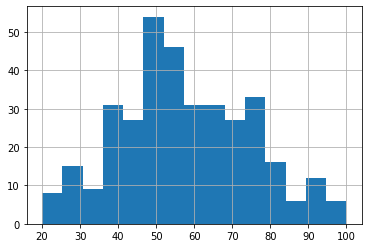

In [68]:
data.score.hist(bins=15)

Вывод - score: распределение признака нормальное с достаточно большой дисперсией. Выбросов теперь нет так как удалили значение 0.0. Добавили новый булевый критерий - no_score, соответствующий значению 0.0. Медиана немного смещена влево. Достаточное количество пропусков - 43, но это следствие добавления нового признака, до добавления признака пропусков было 6.
Вывод - no_score: числовой булевый признак. Пропусков 6. Одно значение в нем достаточно доминирует, но данный признак новый и смоделирован, поэтому целесообразно сохранить структуру пропусков как у score.

[перейти в начало](#start)

## 4. Корреляционный анализ <a name="corr"></a>

Теперь посмотрим на то, какие столбцы коррелируют со score, чтобы понять какие признаки оставить, а какие можно удалить

Корреляцию рассмотрим только для числовых столбцов: age, absences, score

In [79]:
data_num = data[['age', 'absences', 'score']]

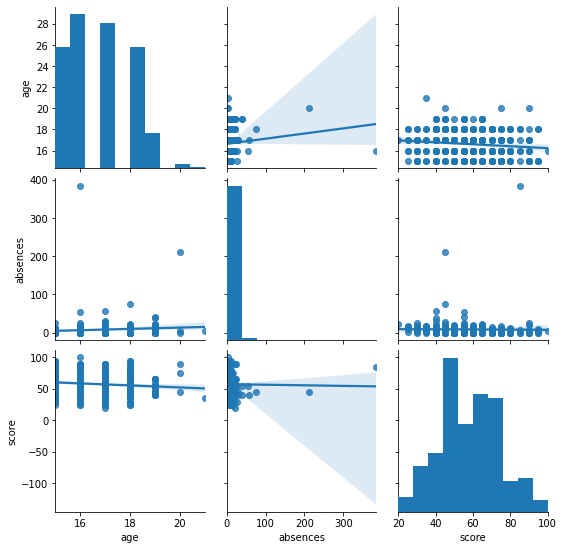

In [80]:
sns.pairplot(data_num, kind = 'reg')

Для лучшего понимания воспользуемся матрицей корреляции

In [81]:
data_num.corr()

,age,absences,score
age,1.000000,0.091656,-0.121579
absences,0.091656,1.000000,-0.014039
score,-0.121579,-0.014039,1.000000


[перейти в начало](#start)

### Анализ категориальных переменных  <a name="categ"></a>

Посмотрим различаются ли распределения рейтинга в зависимости от значения этих переменных.

Признаки для рассмотрения:
- Бинарных (два значения) - 13: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school 
- Оценочных (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health


Для удобства составим списки этих критериев

In [106]:
list_of_binary_columns = ('sex', 'address', 'famsize', 'p_status', 'schoolsup', 
                          'famsup', 'paid', 'activities', 'nursery', 'higher', 
                          'internet', 'romantic', 'school')
list_of_rating_columns = ('m_edu', 'f_edu', 'm_job', 'f_job', 'reason', 
                          'guardian', 'traveltime', 'studytime', 'failures', 
                          'famrel', 'freetime', 'goout', 'health')
list_of_all_columns=[]
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)

[перейти в начало](#start)

### Анализ "бинарных" категориальных признаков <a name="bin_rate"></a>

In [107]:
# функция для бинарных
def get_boxplot_binary(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Построим boxplot для бинарных признаков

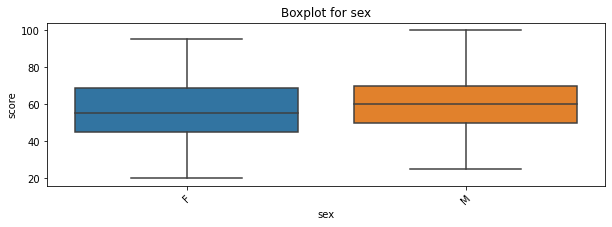

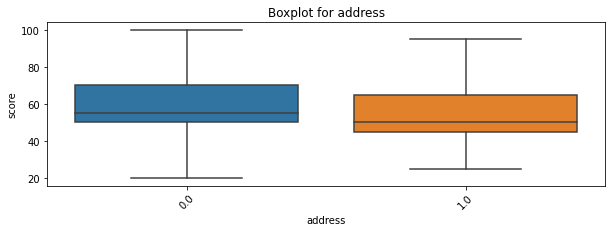

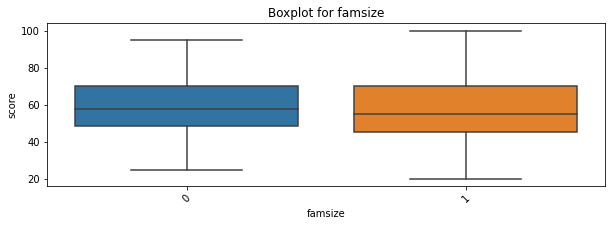

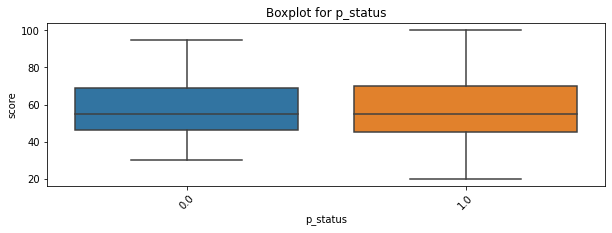

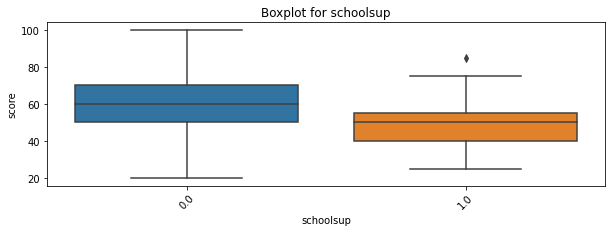

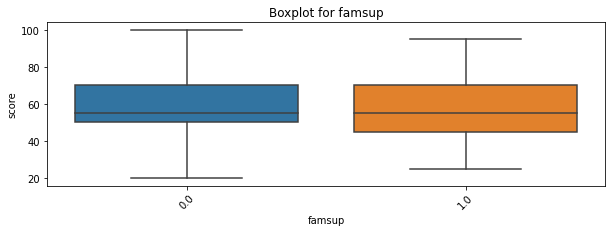

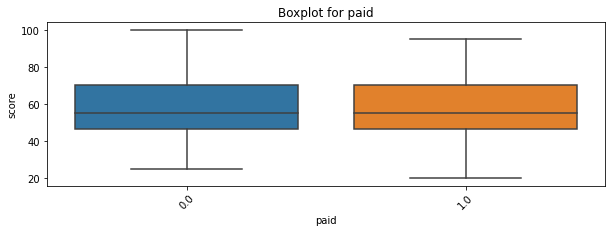

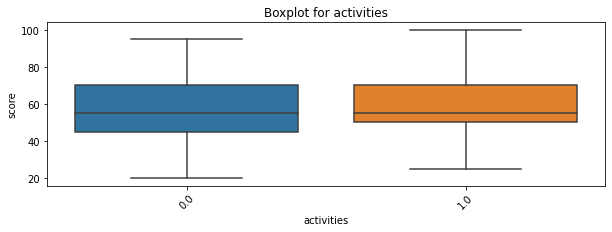

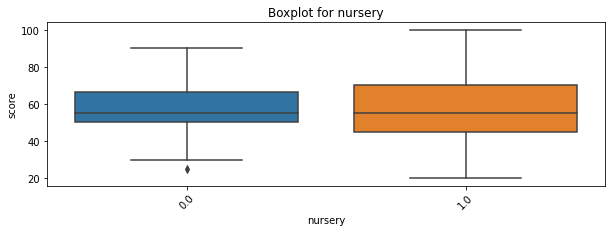

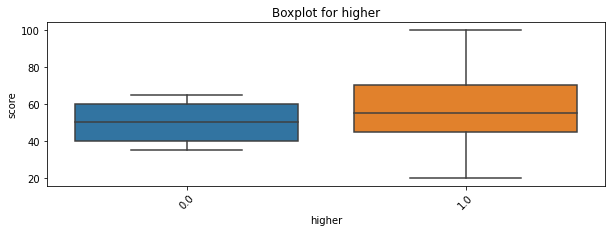

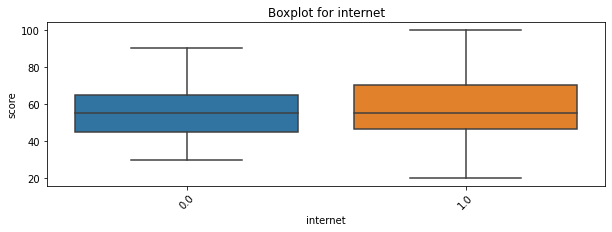

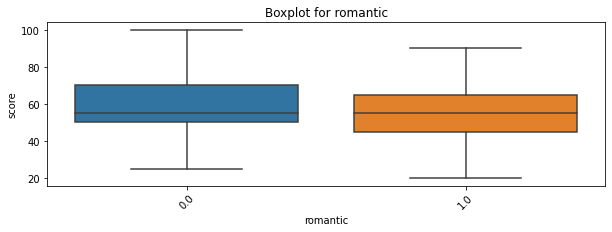

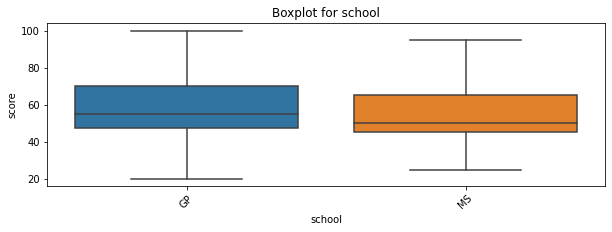

In [108]:
for col in list_of_binary_columns:
    get_boxplot_binary(col)

Можно заменить что плотности распределения существенно различаются для следующих признаков:
- schoolsup
- nursery
- higher

Выводы сделаем после применения теста Стьюдента

[перейти в начало](#start)

### Анализ "оценочных" категориальных переменных <a name="num_rate"></a>

In [109]:
def get_boxplot_rating(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Построим boxplot для оценочных признаков

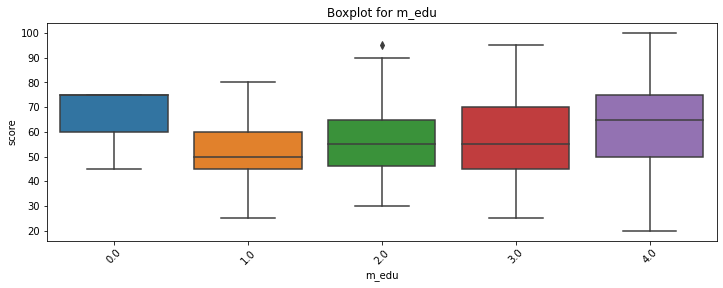

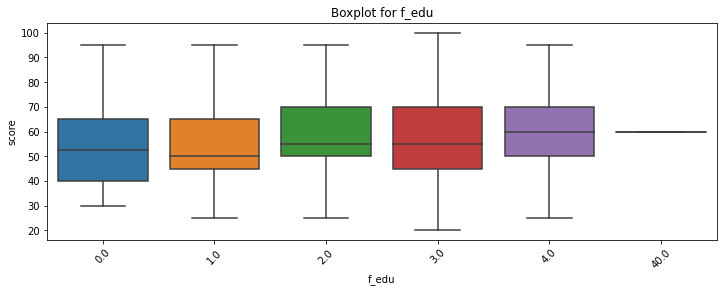

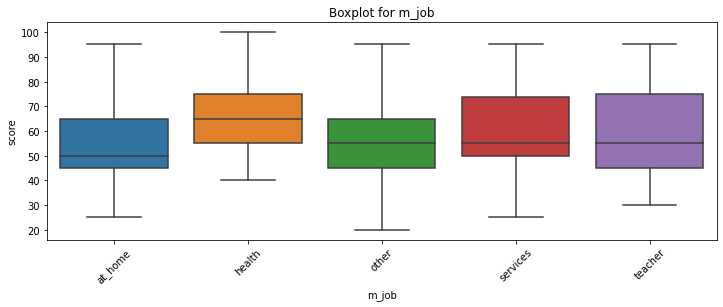

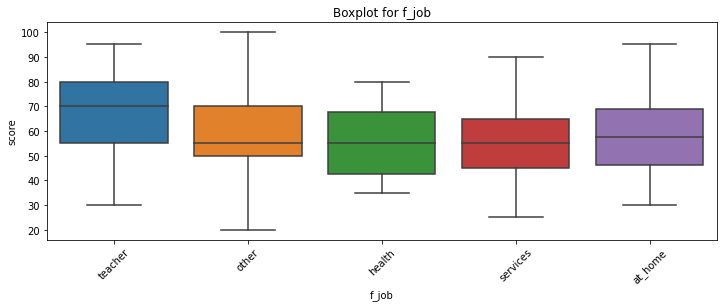

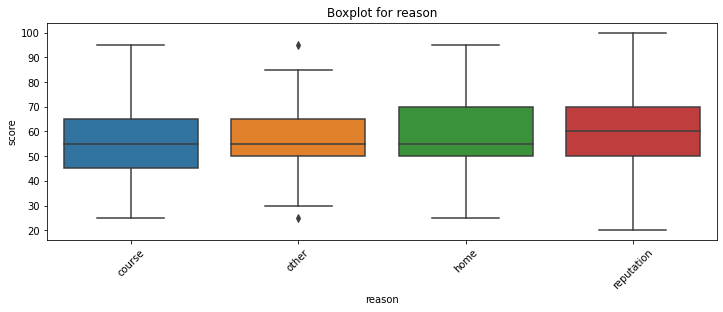

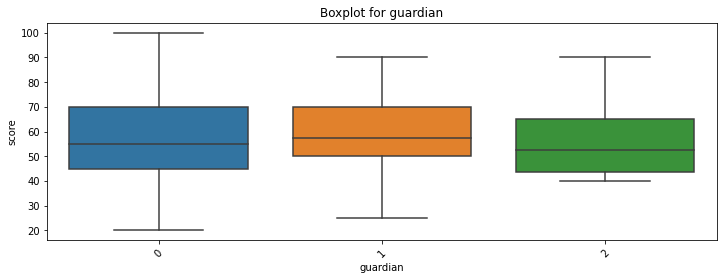

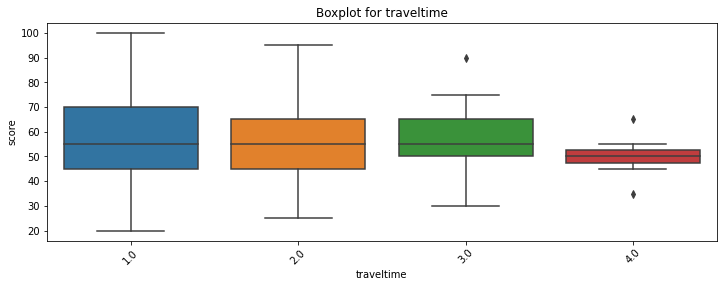

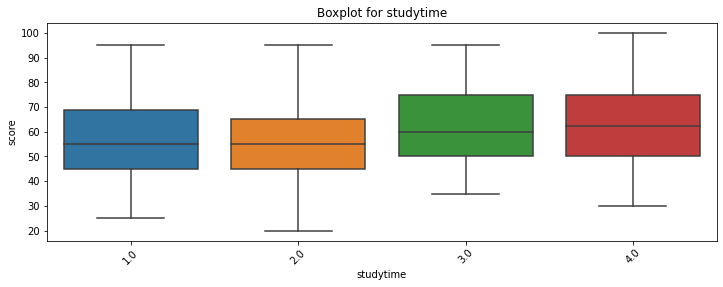

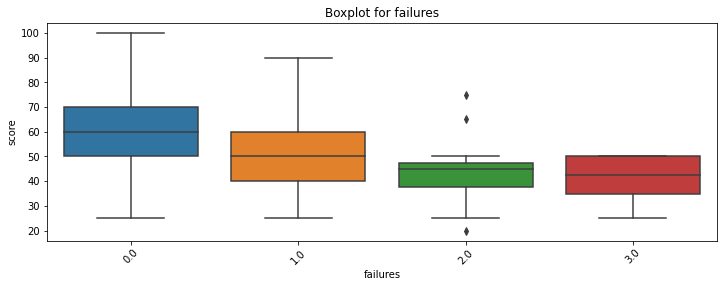

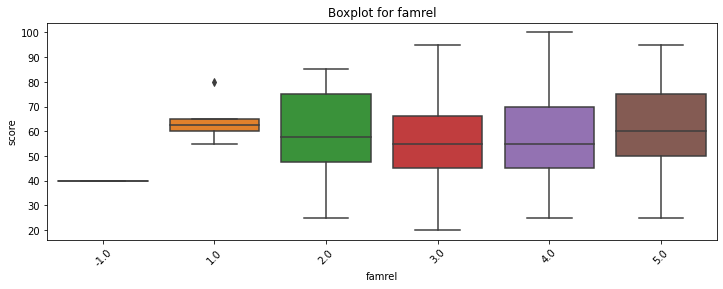

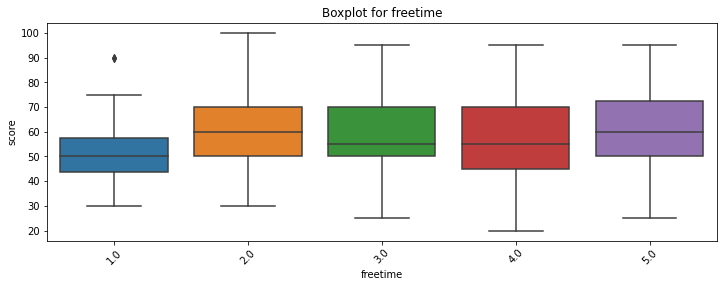

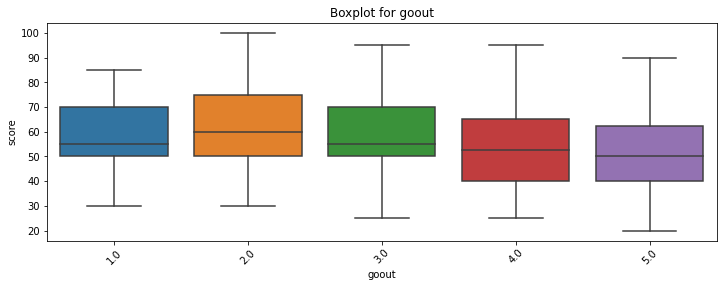

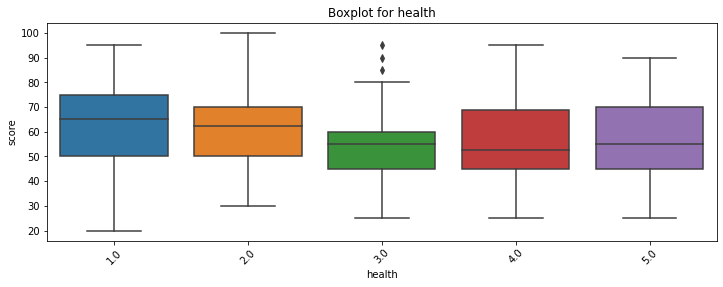

In [110]:
for col in list_of_rating_columns:
    get_boxplot_rating(col)

Видно что плотности распределения сущесвтенно различаются для следующих распределений:
- m_edu
- f_edu
- m_job
- f_job
- studytime
- failures
- goout
- health  

Выводы сделаем после применения теста Стьюдента

[перейти в начало](#start)

### Тест Стьюдента по всем категориальным признакам <a name="ttest"></a>

Проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения score по различным параметрам неразличимы:

In [111]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'].dropna(),
                          data.loc[data.loc[:, column] == comb[1], 'score'].dropna()).pvalue
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [113]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки m_edu
!!!Найдены статистически значимые различия для колонки m_job
!!!Найдены статистически значимые различия для колонки f_job
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки goout


Результат теста Стьюдента (score): достаточно отличаются 9 параметров: address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout. Оставим эти переменные в датасете для дальнейшего построения модели.

Не забудем о новой переменной no_score. Видно, что метод с тестом Стьюдента более конкретный, поэтому строить boxplot для этого нового критерия не будем, а сразу построим новую фукцию и проведем тест Стьюдента.


In [116]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(data.loc[data.loc[:, column] == comb[0], 'no_score'].dropna(),
                          data.loc[data.loc[:, column] == comb[1], 'no_score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [117]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки failures


Результат теста Стьюдента (no_score): достаточно отличаются 4 параметра: paid, higher, romantic, failures. Оставим эти переменные. 

В результате у нас получилось 14 важных переменных , которые, возможно, оказывают влияние на score: age, absences,address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic.

In [118]:
data_for_model = data.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 
                              'higher', 'romantic', 'score', 'no_score']]

In [119]:
data_for_model.head()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,no_score
0,18.0,6.0,0.0,1.0,4.0,4.0,at_home,teacher,2.0,0.0,4.0,0.0,1.0,0.0,30.0,0.0
1,17.0,4.0,0.0,0.0,1.0,1.0,at_home,other,2.0,0.0,3.0,0.0,1.0,0.0,30.0,0.0
2,15.0,10.0,0.0,1.0,1.0,1.0,at_home,other,2.0,3.0,2.0,NaN,1.0,NaN,50.0,0.0
3,15.0,2.0,0.0,0.0,4.0,2.0,health,other,3.0,0.0,2.0,1.0,1.0,1.0,75.0,0.0
4,16.0,4.0,0.0,0.0,3.0,3.0,other,other,2.0,0.0,2.0,1.0,1.0,0.0,50.0,0.0


Проверим нет ли дублей (очень сильно скоррелированных столбцов)

In [124]:
data_for_model.corr()

,age,absences,address,schoolsup,m_edu,f_edu,studytime,failures,goout,paid,higher,romantic,score,no_score
age,1.000000,0.091656,0.166546,-0.258162,-0.167155,-0.124180,-0.002256,0.201066,0.124281,-0.020801,-0.167505,0.132071,-0.121579,0.103534
absences,0.091656,1.000000,-0.027241,0.109676,-0.011159,0.005933,-0.026502,0.055583,-0.049917,-0.015179,-0.010499,0.000414,-0.014039,-0.100701
address,0.166546,-0.027241,1.000000,-0.029669,-0.139757,-0.061153,0.040859,0.109751,-0.050636,-0.055641,-0.049177,0.010021,-0.116251,0.034134
schoolsup,-0.258162,0.109676,-0.029669,1.000000,-0.045111,0.003339,0.030772,0.006551,-0.036570,-0.030622,0.056949,-0.067455,-0.249796,-0.099882
m_edu,-0.167155,-0.011159,-0.139757,-0.045111,1.000000,0.247582,0.080020,-0.242813,0.057505,0.182766,0.178821,0.026486,0.189989,-0.129780
f_edu,-0.124180,0.005933,-0.061153,0.003339,0.247582,1.000000,0.050013,-0.148512,-0.023707,0.000696,0.086980,-0.032457,0.066992,-0.048182
studytime,-0.002256,-0.026502,0.040859,0.030772,0.080020,0.050013,1.000000,-0.174991,-0.050984,0.198857,0.174235,0.055368,0.139605,-0.034816
failures,0.201066,0.055583,0.109751,0.006551,-0.242813,-0.148512,-0.174991,1.000000,0.125172,-0.184246,-0.288952,0.092875,-0.286925,0.250669
goout,0.124281,-0.049917,-0.050636,-0.036570,0.057505,-0.023707,-0.050984,0.125172,1.000000,0.032285,-0.022773,0.010761,-0.175967,0.021161
paid,-0.020801,-0.015179,-0.055641,-0.030622,0.182766,0.000696,0.198857,-0.184246,0.032285,1.000000,0.197203,0.049475,-0.022039,-0.152928


Видим большое количество значений которые тяжело отследить, поэтому построим тепловую карту:

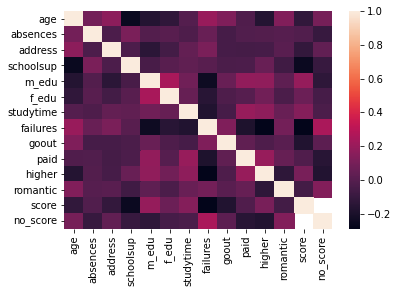

In [125]:
data_for_model_corr = data_for_model.corr()
sns.heatmap(data_for_model_corr)

Cветлых зон кроме диагонали в филаньном датасете нет. Распределение тёмных зон мало. Визуальный осмотр значений по этим столбцам показал, что значений очень близких к 1 или -1 нет, значит все хорошо и датасет готов к использованию для обучения модели.

[перейти в начало](#start)


In [129]:
data_for_model.to_csv('data/train_dataset.csv', index=False)

# Выводы <a name="resum"></a>

В результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

- в данных достаточно много пустых значений, только 3 столбца из 29 заполнены полностью. В некоторых процент пропусков доходит до 12%
- пропуски заполнены в следующих стобцах:
    - address
    - m_edu
    - f_edu
    - m_job
    - f_job
    - studytime
    - failures
    - goout
- выбросы найдены:
  - в столбце возраст (значение 22 удалено)
  - в столбце score (значение 0.0 удалено, на его основе создан новый булевый критерий no_score)
- гипотезы:  
  - отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
  - отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
  - отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
  - положительная корреляция по парамметру m_edu говорит о том, что чем выше значение образования матери тем выше score
  - положительная корреляция по парамметру f_edu говорит о том, что чем выше значение образование отца тем выше score
- cамых важных критериев, которые предлагается использовать в дальнейшем для построения модели 14, это: age, absences, address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic. 

Результат работы включает полностью подготовленный числовой датасет data_for_model сохранённый в train_dataset.csv 

[перейти в начало](#start)